In [1]:
import pandas as pd

dataset = pd.read_csv("arXiv_scientific dataset.csv")

print(dataset)


                      id                                              title  \
0           cs-9308101v1                               Dynamic Backtracking   
1           cs-9308102v1  A Market-Oriented Programming Environment and ...   
2           cs-9309101v1            An Empirical Analysis of Search in GSAT   
3           cs-9311101v1  The Difficulties of Learning Logic Programs wi...   
4           cs-9311102v1  Software Agents: Completing Patterns and Const...   
...                  ...                                                ...   
136233  abs-2408.08541v1         Where is the signal in tokenization space?   
136234  abs-2408.08564v1  Collaborative Cross-modal Fusion with Large La...   
136235  abs-2408.08624v1  RealMedQA: A pilot biomedical question answeri...   
136236  abs-2408.08648v1  Understanding Enthymemes in Argument Maps: Bri...   
136237  abs-2408.08651v2  Reasoning Beyond Bias: A Study on Counterfactu...   

                                                 ca

In [2]:
print (dataset.info())
print(dataset.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136238 entries, 0 to 136237
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  136238 non-null  object
 1   title               136238 non-null  object
 2   category            136238 non-null  object
 3   category_code       136238 non-null  object
 4   published_date      136238 non-null  object
 5   updated_date        136238 non-null  object
 6   authors             136238 non-null  object
 7   first_author        136238 non-null  object
 8   summary             136238 non-null  object
 9   summary_word_count  136238 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 10.4+ MB
None
                  id                               title          category  \
count         136238                              136238            136238   
unique        136238                              136154               138   
top     cs-

In [3]:
dataset["input"]= "Title:" +  dataset["title"] + ". Summary:" +  dataset["summary"]

In [4]:
modelo = dataset[["input","category_code"]]
modelo = modelo.astype(str)
modelo.dropna(inplace= True)
modelo.drop_duplicates(subset=["input"], inplace= True)
print(modelo)

                                                    input category_code
0       Title:Dynamic Backtracking. Summary:Because of...         cs.AI
1       Title:A Market-Oriented Programming Environmen...         cs.AI
2       Title:An Empirical Analysis of Search in GSAT....         cs.AI
3       Title:The Difficulties of Learning Logic Progr...         cs.AI
4       Title:Software Agents: Completing Patterns and...         cs.AI
...                                                   ...           ...
136233  Title:Where is the signal in tokenization spac...         cs.CL
136234  Title:Collaborative Cross-modal Fusion with La...         cs.IR
136235  Title:RealMedQA: A pilot biomedical question a...         cs.CL
136236  Title:Understanding Enthymemes in Argument Map...         cs.AI
136237  Title:Reasoning Beyond Bias: A Study on Counte...         cs.CL

[136217 rows x 2 columns]


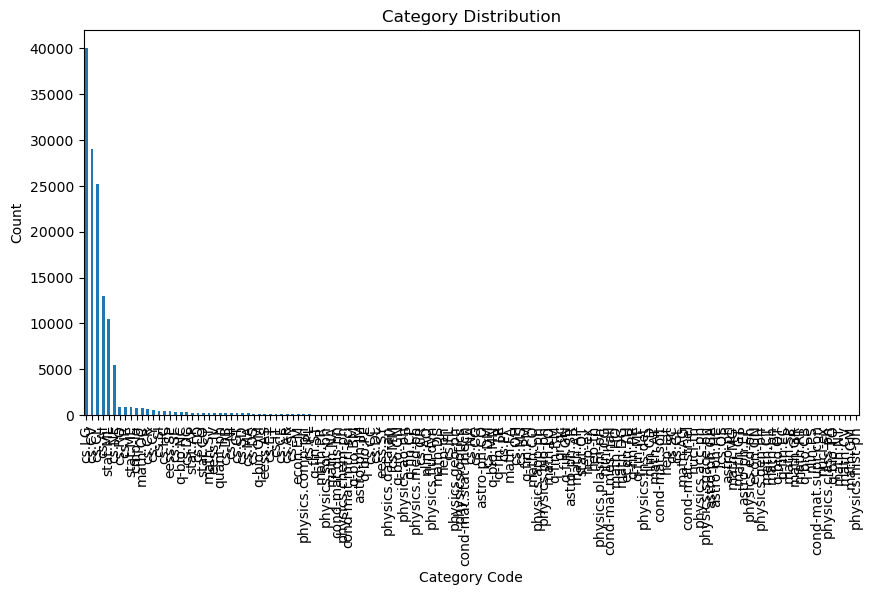

In [5]:
import matplotlib.pyplot as plt

# Count of each category
dataset['category_code'].value_counts().plot(kind='bar', figsize=(10,5))

plt.title("Category Distribution")
plt.xlabel("Category Code")
plt.ylabel("Count")
plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

modelo["category_code"] = encoder.fit_transform(modelo["category_code"])

category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(category_mapping)

{'astro-ph': 0, 'astro-ph.CO': 1, 'astro-ph.EP': 2, 'astro-ph.GA': 3, 'astro-ph.HE': 4, 'astro-ph.IM': 5, 'astro-ph.SR': 6, 'cmp-lg': 7, 'cond-mat.dis-nn': 8, 'cond-mat.mes-hall': 9, 'cond-mat.mtrl-sci': 10, 'cond-mat.soft': 11, 'cond-mat.stat-mech': 12, 'cond-mat.str-el': 13, 'cond-mat.supr-con': 14, 'cs.AI': 15, 'cs.AR': 16, 'cs.CC': 17, 'cs.CE': 18, 'cs.CG': 19, 'cs.CL': 20, 'cs.CR': 21, 'cs.CV': 22, 'cs.CY': 23, 'cs.DB': 24, 'cs.DC': 25, 'cs.DL': 26, 'cs.DM': 27, 'cs.DS': 28, 'cs.ET': 29, 'cs.FL': 30, 'cs.GL': 31, 'cs.GR': 32, 'cs.GT': 33, 'cs.HC': 34, 'cs.IR': 35, 'cs.IT': 36, 'cs.LG': 37, 'cs.LO': 38, 'cs.MA': 39, 'cs.MM': 40, 'cs.MS': 41, 'cs.NA': 42, 'cs.NE': 43, 'cs.NI': 44, 'cs.OH': 45, 'cs.OS': 46, 'cs.PF': 47, 'cs.PL': 48, 'cs.RO': 49, 'cs.SC': 50, 'cs.SD': 51, 'cs.SE': 52, 'cs.SI': 53, 'cs.SY': 54, 'econ.EM': 55, 'econ.GN': 56, 'econ.TH': 57, 'eess.AS': 58, 'eess.IV': 59, 'eess.SP': 60, 'eess.SY': 61, 'gr-qc': 62, 'hep-ex': 63, 'hep-lat': 64, 'hep-ph': 65, 'hep-th': 66, 'm

In [7]:
category_counts = modelo["category_code"].value_counts()

model = modelo[modelo["category_code"].isin(category_counts[category_counts>1].index)]

print(f"Before filtering: {modelo.shape[0]} samples")
print(f"After filtering: {model.shape[0]} samples")

Before filtering: 136217 samples
After filtering: 136208 samples


In [8]:
from sklearn.model_selection import train_test_split

train_dataset, valid_dataset = train_test_split(model, test_size=0.2, random_state=42, stratify=model["category_code"]) # Uso de Stratify para mantener la proporción de categorías en el conjunto de validación

# Check sizes
print(f"Train size: {len(train_dataset)}, Validation size: {len(valid_dataset)}")

Train size: 108966, Validation size: 27242


In [9]:
# Convert 'input' column to ensure it's all strings
train_dataset['input'] = train_dataset['input'].astype(str)
valid_dataset['input'] = valid_dataset['input'].astype(str)

# Check for missing or empty values
train_dataset['input'].fillna("", inplace=True)
valid_dataset['input'].fillna("", inplace=True)

# Verify data types
print(train_dataset.dtypes)
print(valid_dataset.head())

input            object
category_code     int32
dtype: object
                                                   input  category_code
24588  Title:PAC Classification based on PAC Estimate...             37
60509  Title:Cascade Feature Aggregation for Human Po...             22
51740  Title:An Overview of the Research on Texture B...             22
75748  Title:Fast Algorithms for Learning Latent Vari...            137
47637  Title:TSGB: Target-Selective Gradient Backprop...             22


Creating FastAI DataLoaders

In [10]:
import torch
import pandas as pd
from transformers import AutoTokenizer




In [11]:
MODEL_NAME = "google/electra-small-discriminator" # Choosing a pre-trained model

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
print("Fast Tokenizer Enabled:", tokenizer.is_fast)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Fast Tokenizer Enabled: True


In [12]:
# Use Hugging Face Tokenizer

# Define tokenization function
def tok_func(x):
    return tokenizer(x, padding="max_length", max_length=512, truncation=True)

In [13]:
from datasets import Dataset
from tqdm import tqdm

train_dataset = Dataset.from_pandas(train_dataset)
val_dataset = Dataset.from_pandas(valid_dataset)

# Define tokenization function
def tokenize_function(batch):
    return tokenizer(batch["input"], padding="max_length", truncation=True, max_length=512)

# Wrap tqdm around the dataset mapping
print("Tokenizing training dataset...")
train_dataset = train_dataset.map(tokenize_function, batched=True, desc="Training Tokenization", batch_size=32)

print("Tokenizing validation dataset...")
val_dataset = val_dataset.map(tokenize_function, batched=True, desc="Validation Tokenization", batch_size=32)

print("Tokenization Complete!")



Tokenizing training dataset...


Training Tokenization:   0%|          | 0/108966 [00:00<?, ? examples/s]

Tokenizing validation dataset...


Validation Tokenization:   0%|          | 0/27242 [00:00<?, ? examples/s]

Tokenization Complete!


In [14]:
# Check the first few rows of tokenized data
print(train_dataset[0])
print(val_dataset[0])

# Drop unnecessary columns
train_dataset = train_dataset.remove_columns(["input", "__index_level_0__"])
val_dataset = val_dataset.remove_columns(["input", "__index_level_0__"])


print(train_dataset[0])
print(val_dataset[0])


{'input': "Title:Virtual Control Group: Measuring Hidden Performance Metrics. Summary:Performance metrics measuring in Financial Integrity systems are crucial for\nmaintaining an efficient and cost effective operation. An important performance\nmetric is False Positive Rate. This metric cannot be directly monitored since\nwe don't know for sure if a user is bad once blocked. We present a statistical\nmethod based on survey theory and causal inference methods to estimate the\nfalse positive rate of the system or a single blocking policy. We also suggest\na new approach of outcome matching that in some cases including empirical data\noutperformed other commonly used methods. The approaches described in this\npaper can be applied in other Integrity domains such as Cyber Security.", 'category_code': 37, '__index_level_0__': 32486, 'input_ids': [101, 2516, 1024, 7484, 2491, 2177, 1024, 9854, 5023, 2836, 12046, 2015, 1012, 12654, 1024, 2836, 12046, 2015, 9854, 1999, 3361, 11109, 3001, 2024, 

In [15]:
import torch

# Convert labels to tensor format
train_dataset = train_dataset.map(lambda x: {"labels": torch.tensor(x["category_code"])})
val_dataset = val_dataset.map(lambda x: {"labels": torch.tensor(x["category_code"])})

print("✅ Labels converted to tensor format!")


Map:   0%|          | 0/108966 [00:00<?, ? examples/s]

Map:   0%|          | 0/27242 [00:00<?, ? examples/s]

✅ Labels converted to tensor format!


In [16]:
# Remove more columns
train_dataset = train_dataset.remove_columns(["category_code"])
val_dataset = val_dataset.remove_columns(["category_code"])

# Check dataset structure
print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)



# Print a sample
print("Sample from Training Dataset:", train_dataset[0])


Train Dataset: Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 108966
})
Validation Dataset: Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 27242
})
Sample from Training Dataset: {'input_ids': [101, 2516, 1024, 7484, 2491, 2177, 1024, 9854, 5023, 2836, 12046, 2015, 1012, 12654, 1024, 2836, 12046, 2015, 9854, 1999, 3361, 11109, 3001, 2024, 10232, 2005, 8498, 2019, 8114, 1998, 3465, 4621, 3169, 1012, 2019, 2590, 2836, 12046, 2003, 6270, 3893, 3446, 1012, 2023, 12046, 3685, 2022, 3495, 17785, 2144, 2057, 2123, 1005, 1056, 2113, 2005, 2469, 2065, 1037, 5310, 2003, 2919, 2320, 8534, 1012, 2057, 2556, 1037, 7778, 4118, 2241, 2006, 5002, 3399, 1998, 28102, 28937, 4725, 2000, 10197, 1996, 6270, 3893, 3446, 1997, 1996, 2291, 2030, 1037, 2309, 10851, 3343, 1012, 2057, 2036, 6592, 1037, 2047, 3921, 1997, 9560, 9844, 2008, 1999, 2070, 3572, 2164, 17537, 2951, 2041, 4842, 29021, 2060, 4141, 2109, 

In [17]:
# Get number of categories
num_labels = len(set(train_dataset["labels"]))
print(f"num of categories: {num_labels}")

num of categories: 130


In [18]:
# Create a label mapping dictionary (consecutive numbers)
unique_labels = sorted(set(train_dataset["labels"]))  # Sorted unique labels
label_map = {label: idx for idx, label in enumerate(unique_labels)}

print("New Label Mapping:", label_map)  # Print mapping for verification


New Label Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 74: 72, 75: 73, 76: 74, 78: 75, 79: 76, 80: 77, 81: 78, 82: 79, 83: 80, 85: 81, 86: 82, 87: 83, 88: 84, 89: 85, 90: 86, 91: 87, 92: 88, 95: 89, 96: 90, 97: 91, 98: 92, 99: 93, 100: 94, 102: 95, 103: 96, 104: 97, 105: 98, 106: 99, 107: 100, 109: 101, 110: 102, 111: 103, 112: 104, 113: 105, 114: 106, 115: 107, 116: 108, 117: 109, 118: 110, 119: 111, 120: 112, 121: 113, 122: 114, 124: 115, 125: 116, 126: 117, 127: 118, 128:

In [19]:
# Apply mapping function to re-label dataset
train_dataset = train_dataset.map(lambda x: {"labels": label_map[x["labels"]]})
val_dataset = val_dataset.map(lambda x: {"labels": label_map[x["labels"]]})

print("✅ Labels successfully re-mapped!")

Map:   0%|          | 0/108966 [00:00<?, ? examples/s]

Map:   0%|          | 0/27242 [00:00<?, ? examples/s]

✅ Labels successfully re-mapped!


In [ ]:
from transformers import AutoModelForSequenceClassification


try:
    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME,
        num_labels=num_labels  # Ensure the number of labels is set correctly
    )
    print("✅ Model loaded successfully!")
except OSError as e:
    print(f"❌ Model loading failed: {e}")



pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model loaded successfully!


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir= "./results",    # Save model checkpoints here
    evaluation_strategy= "epoch", # Evaluate after each epoch
    save_strategy= "epoch",     # Save model after each epoch
    per_device_eval_batch_size=2,  # Adjust based on available GPU memory
    per_device_train_batch_size=2,
    num_train_epochs=3,   # Number of training epochs
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    report_to="none", # Disables logging to external services (like WandB)
    fp16=True  
)
print("✅ Training arguments set up!")

✅ Training arguments set up!


C:\Users\luis\AppData\Roaming\Python\Python311\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [22]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args = training_args,
    train_dataset= train_dataset,
    eval_dataset = val_dataset,
    tokenizer = tokenizer
)

model.safetensors:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

C:\Users\luis\AppData\Local\Temp\ipykernel_20740\3980267656.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [23]:
trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [28]:
print("New unique labels:", sorted(set(train_dataset["labels"])))


New unique labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]
